<a href="https://colab.research.google.com/github/Shoki-Shoki/Keras-Artifical-Neural-Networks-/blob/main/Simple_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.version.VERSION)

2.4.1


VariationalAutoencoder using MNIST dataset

In [3]:
#Importing dependancies and MNIST dataset

import keras
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets import mnist
import numpy as np



In [4]:


# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


Creating the encoder and decoder 

In [6]:
encoder=keras.Model(input_img,encoded)

encoded_input=keras.Input(shape=(encoding_dim))

decoder_layer=autoencoder.layers[-1]

decoder=keras.Model(encoded_input,decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam',loss='binary_crossentropy')




Training and testing 

In [7]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


Autoencoder for n epoch ,The value of the epoch can be changed n=10

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1176 - val_loss: 0.1123
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1107 - val_loss: 0.1066
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1057 - val_loss: 0.1024
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1020 - val_loss: 0.0993
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0994 - val_loss: 0.0973
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0975 - val_loss: 0.0955
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0962 - val_loss: 0.0947
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0954 - val_loss: 0.0939
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0949 - val_loss: 0.0935
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0945 - val_lo

Results 

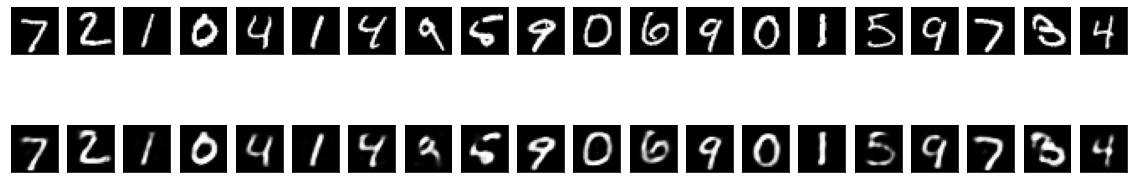

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


**References **



1.Building autoencoders in kera  https://keras.io/